In [1]:
import sys
import os
sys.path.append("/home/kirilman/Project/asbestos/yolov5")
sys.path.append("/home/kirilman/Project/asbestos/")
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import cv2
from tools import plot_bboxs
from pathlib import Path
from dataset.albumentaion import yolo_image_generator, Albumentations
%load_ext autoreload
%autoreload 2
from utils.dataloaders import LoadImagesAndLabels, create_dataloader

/home/kirilman/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_to_dataset = Path('/home/kirilman/Project/dataset/detection_set2/')
dataset = LoadImagesAndLabels(path_to_dataset)
img,o_shape, r_shape = dataset.load_image(2)

Scanning '/home/kirilman/Project/dataset/detection_set2/labels.cache' images and


In [165]:
generator = yolo_image_generator(os.path.join(path_to_dataset, "images"),(720, 720),15)
iterator = iter(generator)

In [166]:
img,l = next(iterator)
plt.imshow(img)
img.shape

[[          0     0.45529     0.11632     0.43034     0.23263]
 [          0     0.79578     0.15971     0.32441     0.31534]
 [          0     0.73889     0.76558     0.43511     0.46884]
 [          0     0.96792     0.38703    0.064155       0.173]
 [          0     0.21908     0.19123      0.3182     0.30458]
 [          0     0.44866     0.39836     0.36676     0.52875]
 [          0     0.32737     0.80772     0.39949     0.34357]
 [          0     0.55695     0.61035     0.23103     0.33382]
 [          0      0.7385     0.36632     0.25798     0.41423]
 [          0     0.23928     0.38922     0.33885     0.32043]
 [          0    0.077288     0.77289     0.15458     0.45422]
 [          0     0.17496    0.023709      0.1698    0.047378]
 [          0     0.39178     0.92895     0.31674     0.14209]]
/home/kirilman/Project/dataset/detection_set2/images/10_11_56_42_16-03-2020_1.jpg
alb: [[          0     0.45529     0.11632     0.43034     0.23263]
 [          0     0.79578     

ValueError: Expected x_min for bbox (-1.9999999999187335e-07, 0.5457815, 0.15457579999999999, 1.0000005, 0.0) to be in the range [0.0, 1.0], got -1.9999999999187335e-07.

In [5]:
a = np.loadtxt('../../../dataset/detection_set2/labels/1_11_32_12_16-03-2020_1.txt')
a

array([[          0,     0.66797,      0.1414,     0.23826,     0.25871],
       [          0,     0.81214,     0.72251,     0.32354,     0.52315],
       [          0,     0.62126,     0.58092,     0.25044,     0.25711],
       [          0,    0.092637,     0.53424,     0.17198,     0.18343],
       [          0,     0.81214,     0.34871,      0.2017,     0.24158],
       [          0,     0.19075,     0.31693,     0.28725,     0.31232],
       [          0,     0.16831,    0.077893,     0.18614,     0.15579],
       [          0,     0.53489,     0.85071,     0.30018,     0.29857],
       [          0,     0.43276,     0.34764,     0.19761,     0.26045],
       [          0,     0.40841,     0.61291,      0.1993,     0.32481],
       [          0,     0.49345,     0.71626,     0.19983,     0.25958],
       [          0,     0.35559,     0.89366,     0.19781,     0.19995],
       [          0,      0.2554,     0.61645,     0.20756,     0.36273],
       [          0,     0.15778,     

In [167]:
albu = Albumentations()
img = cv2.imread('../../../dataset/detection_set2/images/10_11_57_04_16-03-2020_1.jpg')
img = cv2.resize(img, (512, 386), interpolation=cv2.INTER_AREA)
img, l = albu(img,np.zeros((2,5),dtype = float) + 0.9)
fig = plt.figure(figsize = (6,6), dpi = 150)
plt.imshow(img)

alb: [[        0.9         0.9         0.9         0.9         0.9]
 [        0.9         0.9         0.9         0.9         0.9]]


ValueError: Expected x_max for bbox (0.45, 0.45, 1.35, 1.35, 0.9) to be in the range [0.0, 1.0], got 1.35.

alb: [[        0.5         0.5         0.5         0.5         0.5]
 [        0.5         0.5         0.5         0.5         0.5]]


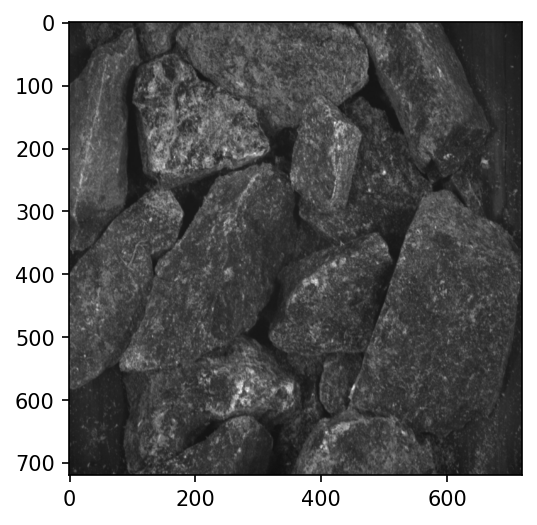

In [78]:
albu = Albumentations()
img = cv2.imread('../../../dataset/detection_set2/images/10_11_57_04_16-03-2020_1.jpg')
img = cv2.resize(img, (720,720), interpolation=cv2.INTER_AREA)
fig = plt.figure(dpi = 150)
plt.imshow(img)
im, l = albu(img,np.zeros((2,5),dtype = float) + 0.5)

In [15]:
IMG_SIZE = 728
inf, loader = create_dataloader(path_to_dataset, IMG_SIZE, 1, 0, single_cls= True, augment = True, hyp={"degrees":45, #поворот
                                                                    "translate":0.,
                                                                    "scale":0.01,              #маштабирование
                                                                            "shear":0.3,      #сферические линии
                                                                            "perspective":0.0,
                                                                    "copy_paste":0.5,
                                                                    "flipud":0,
                                                                    "mixup":0.5,
                                                                                                        
                                                                    "mosaic": True,
                                                                    "hsv_h": 1,
                                                                    "hsv_v": 1, "hsv_s":1, "fliplr":1,"fliplr":1,
                                                                                                        
                                                                    })

albumentations: Blur(always_apply=False, p=0.01, blur_limit=(3, 7)), MedianBlur(always_apply=False, p=0.01, blur_limit=(3, 7)), ToGray(always_apply=False, p=0.01), CLAHE(always_apply=False, p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
Scanning '/home/kirilman/Project/dataset/detection_set2/labels.cache' images and


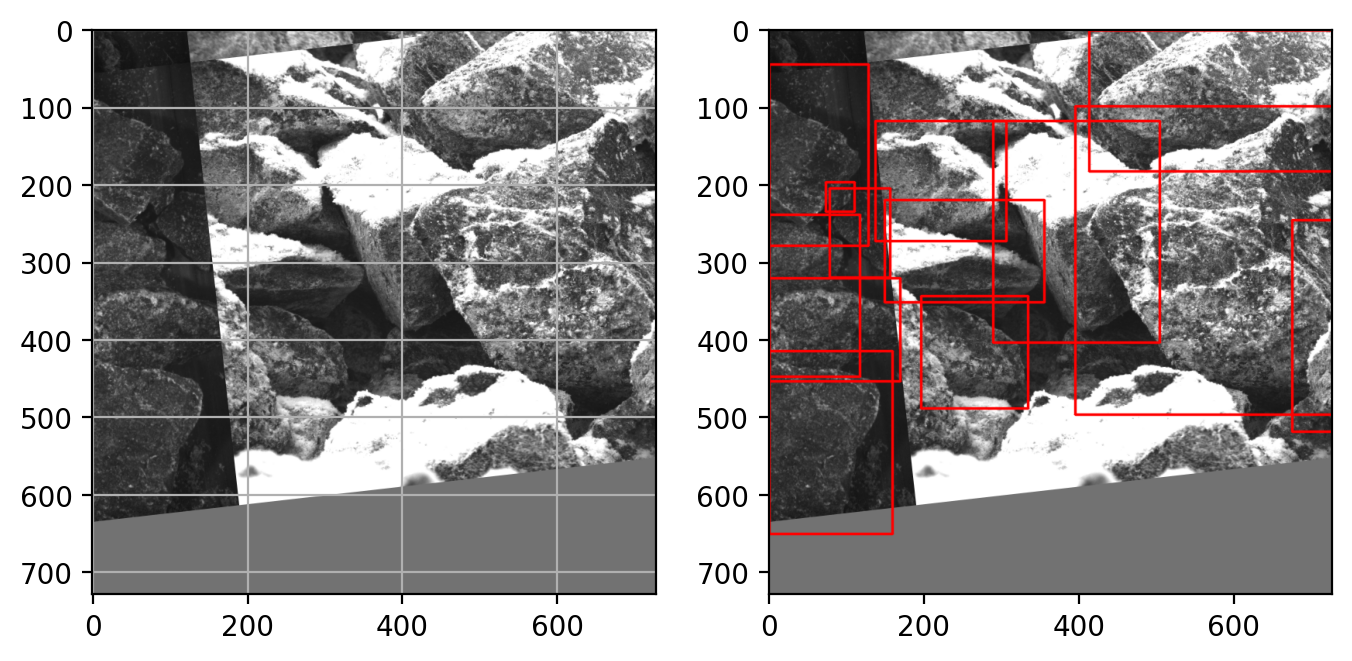

In [16]:
img, labels = loader.load_mosaic(0)
fig, axs = plt.subplots(1,2, figsize = (8,8), dpi = 200)
axs[0].imshow(img)
axs[0].grid('minor')
img = plot_bboxs(img, labels[:,1:]/IMG_SIZE)
axs[1].imshow(img)

In [11]:
IMG_SIZE = 728
inf, loader = create_dataloader(path_to_dataset, IMG_SIZE, 1, 0, single_cls= True, augment = True, hyp={"degrees":0, #поворот
                                                                    "translate":0.,
                                                                    "scale":0.01,              #маштабирование
                                                                            "shear":0.3,      #сферические линии
                                                                            "perspective":0.0,
                                                                    "copy_paste":0.5,
                                                                    "flipud":0,
                                                                    "mixup":0.5,
                                                                                                        
                                                                    "mosaic": False,
                                                                    "hsv_h": 1,
                                                                    "hsv_v": 1, "hsv_s":1, "fliplr":1,"fliplr":1,
                                                                                                        
                                                                    })

albumentations: Blur(always_apply=False, p=0.01, blur_limit=(3, 7)), MedianBlur(always_apply=False, p=0.01, blur_limit=(3, 7)), ToGray(always_apply=False, p=0.01), CLAHE(always_apply=False, p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
Scanning '/home/kirilman/Project/dataset/detection_set2/labels.cache' images and


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


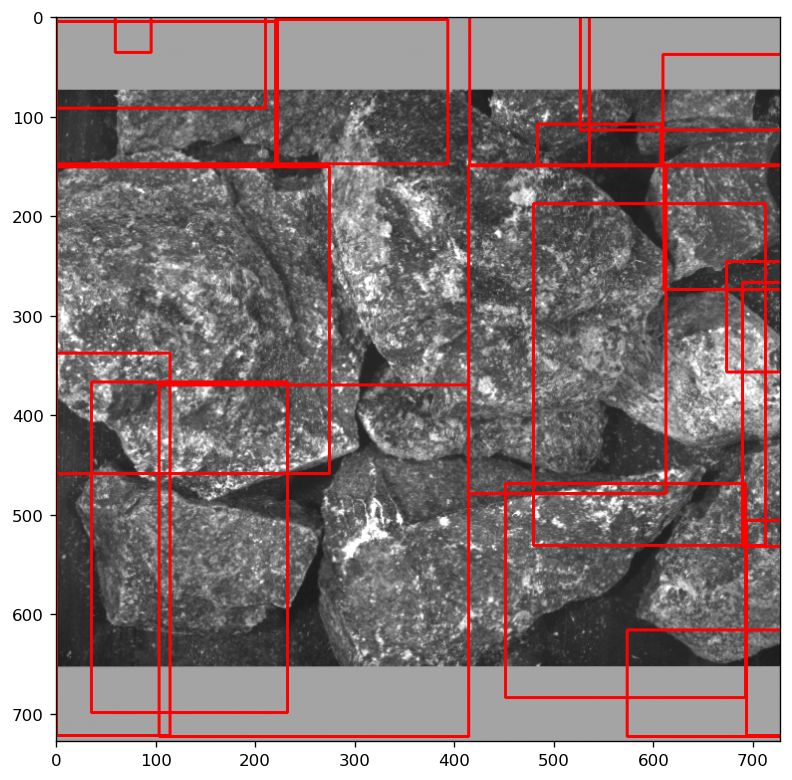

In [14]:
exm = loader[112]
img = exm[0].numpy()
labesls = exm[1].numpy()
t = np.zeros((IMG_SIZE,IMG_SIZE,3))
t[:,:,0] = img[0,:,:]
t[:,:,1] = img[1,:,:]
t[:,:,2] = img[2,:,:]
del img
img = t
img = img/img.max()

img = plot_bboxs(img, labels[:,1:]/IMG_SIZE)
plt.figure(figsize = (8,8),dpi = 120)
plt.imshow(img)

In [38]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import sys
from PIL import Image
import pandas as pd
import torch
from utils.metrics import bbox_ioa

def plot_bboxs(image, bboxs, color = None, line_thickness = None, sline = cv.LINE_AA):
    color = color or [255,0,0]
    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  
    scale_h, scale_w = image.shape[:2]
    for bbox in bboxs:
        scale_x = bbox[[0, 2]]*scale_w
        scale_y = bbox[[1, 3]]*scale_h
        c1 = (int(scale_x[0]), int(scale_y[0]))
        c2 = (int(scale_x[1]), int(scale_y[1]))
        image = cv.rectangle(image, c1, c2, color, tl, lineType=sline)
    return image

def cutout(im, labels, p=0.5):
    # Applies image cutout augmentation https://arxiv.org/abs/1708.04552
    if random.random() < p:
        h, w = im.shape[:2]
        scales = [0.5] * 1 + [0.25] * 2 + [0.125] * 4 + [0.0625] * 8 + [0.03125] * 16  # image size fraction
        for s in scales:
            mask_h = random.randint(1, int(h * s))  # create random masks
            mask_w = random.randint(1, int(w * s))

            # box
            xmin = max(0, random.randint(0, w) - mask_w // 2)
            ymin = max(0, random.randint(0, h) - mask_h // 2)
            xmax = min(w, xmin + mask_w)
            ymax = min(h, ymin + mask_h)

            # apply random color mask
            im[ymin:ymax, xmin:xmax] = [random.randint(64, 191) for _ in range(3)]

            # return unobscured labels
            if len(labels) and s > 0.03:
                box = np.array([xmin, ymin, xmax, ymax], dtype=np.float32)
                ioa = bbox_ioa(box, labels[:, 1:5])  # intersection over area
                labels = labels[ioa < 0.60]  # remove >60% obscured labels

    return labels

IndexError: index 3 is out of bounds for axis 0 with size 3

<Figure size 864x864 with 0 Axes>

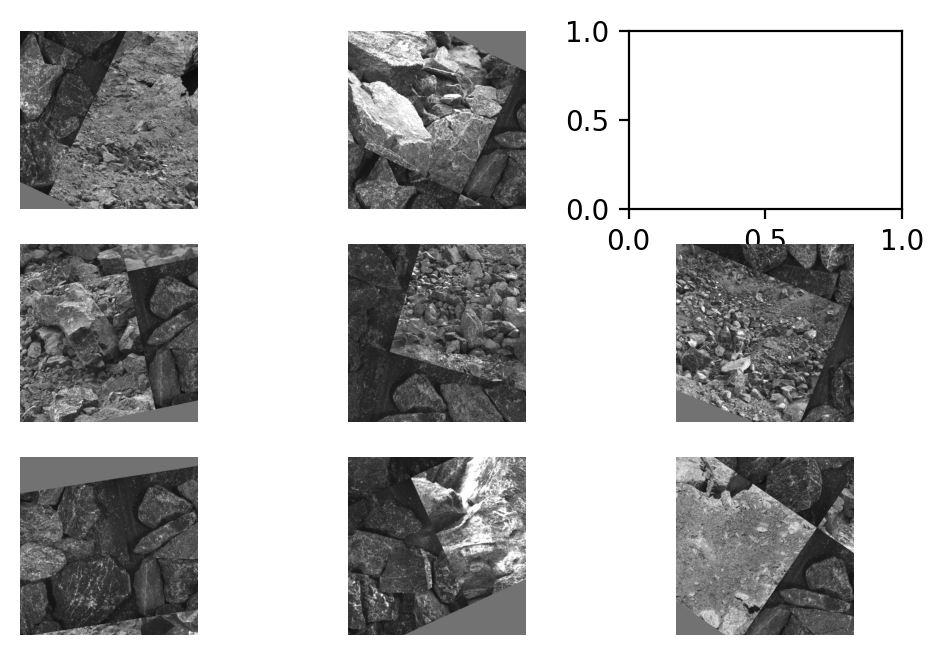

In [30]:
plt.figure(figsize = (12,12))

img, labels = loader.load_mosaic(15)
# labels = loader.labels[6]

N = 3
r = k = 0
f, axes = plt.subplots(N,N, dpi = 200)
plt.axis('off')  
for i in range(N*N):
    img, labels = loader.load_mosaic(0)
    axes[r,k].imshow(img)
    axes[r,k].axis('off')  
    k+=1
    if i%3 == 1:
        r +=1
        k = 0


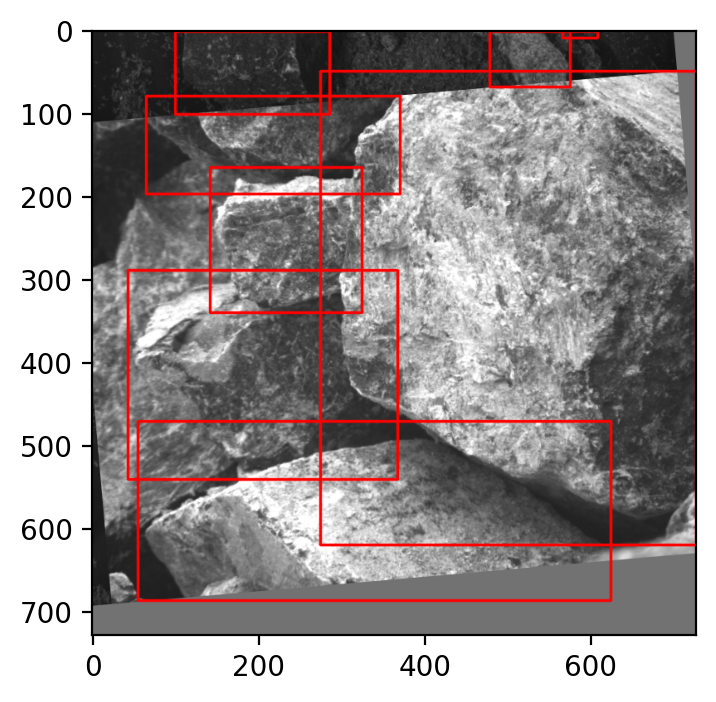

In [31]:
img, labels = loader.load_mosaic(0)
plt.figure(dpi = 200)
plt.imshow(plot_bboxs(img, labels[:,1:]/IMG_SIZE))

In [33]:
!python ../../yolov5/train.py --help

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--bucket BUCKET] [--cache [CACHE]] [--image-weights]
                [--device DEVICE] [--multi-scale] [--single-cls]
                [--optimizer {SGD,Adam,AdamW}] [--sync-bn] [--workers WORKERS]
                [--project PROJECT] [--name NAME] [--exist-ok] [--quad]
                [--cos-lr] [--label-smoothing LABEL_SMOOTHING]
                [--patience PATIENCE] [--freeze FREEZE [FREEZE ...]]
                [--save-period SAVE_PERIOD] [--seed SEED]
                [--local_rank LOCAL_RANK] [--entity ENTITY]
                [--upload_dataset [UPLOAD_DATASET]]
                [--bbox_interval BBOX_INTERVAL]
                [--artifact_alias ARTIFACT_ALIAS]

optional arguments:
  -h, -

In [21]:
!python ../../yolov5/train.py --img 512 --batch 16 --epochs 200 --data ../../../dataset/detection_set2/data.yaml --weights yolov5n.pt --single-cls --name 'detect' 

train: weights=yolov5n.pt, cfg=, data=../../../dataset/detection_set2/data.yaml, hyp=../../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=True, optimizer=SGD, sync_bn=False, workers=8, project=../../yolov5/runs/train, name=detect, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 26 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8,

In [15]:
!python ../../yolov5/detect.py --weights /home/kirilman/Project/asbestos/yolov5/runs/train/pits_detect4/weights/best.pt --img 512 --conf 0.7 --source /home/kirilman/Project/dataset/270421/1/AutoScan_27-04-2021-14-23-17/Detailed

detect: weights=['/home/kirilman/Project/asbestos/yolov5/runs/train/pits_detect4/weights/best.pt'], source=/home/kirilman/Project/dataset/270421/1/AutoScan_27-04-2021-14-23-17/Detailed, data=../../yolov5/data/coco128.yaml, imgsz=[512, 512], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../../yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
Model summary: 378 layers, 35248920 parameters, 0 gradients
image 1/49 /home/kirilman/Project/dataset/270421/1/AutoScan_27-04-2021-14-23-17/Detailed/27-04-2021-14-24-26_1_1_79_detailed.bmp: 448x512 2 class0s, Done. (0.011s)
image 2/49 /home/kirilman/Project/dataset/270421/1/A